In [2]:
import numpy as np
import matplotlib.pyplot as plot

figures_dir = 'F:/projects/paper_figures/t010_f2/thesis/'



[0.59 0.27 0.33 0.46]


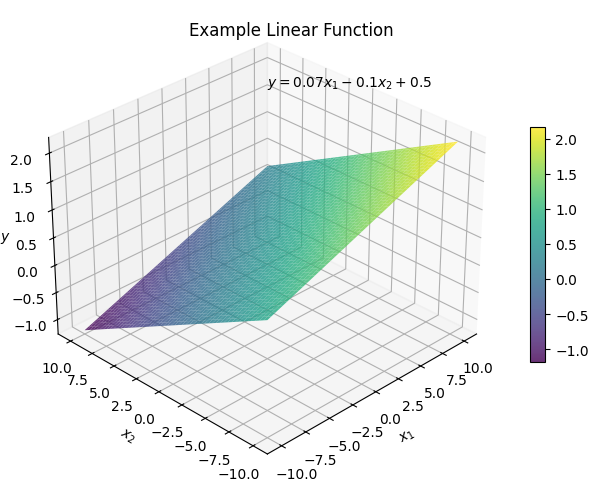

In [138]:
x1 =np.linspace(-10,10,100)
x2 =np.linspace(-10,10,100)
x1grid,x2grid =np.meshgrid(x1,x2)
y = 0.07*x1grid-0.1*x2grid+0.5


from mpl_toolkits.mplot3d import Axes3D

# Create the figure
fig = plot.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x1grid, x2grid, y, cmap='viridis', alpha=0.8, 
                      linewidth=0, antialiased=True)

# Set isometric view angles
# Elevation (vertical rotation, in degrees)
elevation = 30
# Azimuth (horizontal rotation, in degrees) 
# Standard isometric view is typically at azimuth of -45 or 225 degrees
azimuth = 225

ax.view_init(elev=elevation, azim=azimuth)

# data points
x1_points = np.array([2,1,-1,-2])
x2_points = np.array([0.5,3,1,-1])
y_points = 0.07*x1_points-0.1*x2_points+0.5
print(y_points)

# Set labels
ax.set_xlabel('$x_1$',fontsize=10)
ax.set_ylabel('$x_2$',fontsize=10)
ax.set_zlabel('$y$',fontsize=10,labelpad=-1)
ax.text(-4,4,4,'Example Linear Function',fontsize=12)
ax.text(1,1,3,'$y=0.07x_1-0.1x_2+0.5$',fontsize=10)

# Add a color bar to show the mapping of Z values to colors
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15)

# Adjust plot parameters
ax.grid(True)
plot.subplots_adjust(left=0.05,top=0.99,right=0.95,bottom=0.05)

# Save the plot (optional)
plot.savefig(figures_dir+'NN_example_function.png', dpi=300)



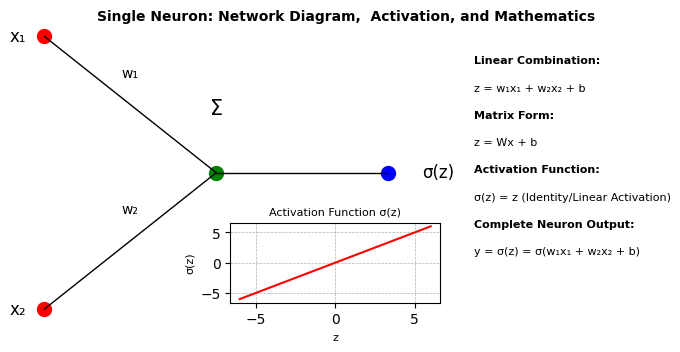

In [159]:


# Create the figure and axis
plot.figure(figsize=(7, 4))

# Draw the neuron network diagram
def draw_neuron_diagram():
    # Input nodes - reduced to two
    input_positions = [(1, 2.5), (1, 1.5)]  # Adjusted positions for better spacing
    for x, y in input_positions:
        plot.plot(x, y, 'ro', markersize=10)  # Red input nodes
    
    # Summation and activation nodes
    plot.plot(2, 2, 'go', markersize=10)  # Green summation node
    plot.plot(3, 2, 'bo', markersize=10)  # Blue output node
    
    # Connections (lines)
    for x, y in input_positions:
        plot.plot([x, 2], [y, 2], 'k-', linewidth=1)
    
    # Summation to activation function
    plot.plot([2, 3], [2, 2], 'k-', linewidth=1)
    
    # Labels - reduced to two
    input_labels = ['x₁', 'x₂']
    for (x, y), label in zip(input_positions, input_labels):
        plot.text(0.8, y, label, fontsize=12, verticalalignment='center')
    
    plot.text(3.2, 2, 'σ(z)', fontsize=12, verticalalignment='center')
    plot.text(2, 2.2, 'Σ', fontsize=15, verticalalignment='bottom', 
             horizontalalignment='center')

    # Weight labels - reduced to two
    weight_labels = ['w₁', 'w₂']
    label_positions = [(1, 2.25), (1, 1.75)]  # Adjusted positions for two weights
    for (x, y), label in zip(label_positions, weight_labels):
        plot.text((x+2)/2, y+0.1, label, fontsize=10, 
                 horizontalalignment='center')

# Mathematical equation section
def draw_equation():
    x_loc = 3.5
    y_loc = 1.7
    plot.text(x_loc, y_loc+0.7, 'Linear Combination:', fontsize=8, fontweight='bold')
    plot.text(x_loc, y_loc+0.6, 'z = w₁x₁ + w₂x₂ + b', fontsize=8)  # Modified to two inputs

    plot.text(x_loc, y_loc+0.5, 'Matrix Form: ',fontsize=8, fontweight='bold')
    plot.text(x_loc, y_loc+0.4, 'z = Wx + b', fontsize=8)
    
    plot.text(x_loc, y_loc+0.3, 'Activation Function:', fontsize=8, fontweight='bold')
    plot.text(x_loc, y_loc+0.2, 'σ(z) = z (Identity/Linear Activation)', fontsize=8)
    
    plot.text(x_loc, y_loc+0.1, 'Complete Neuron Output:', fontsize=8, fontweight='bold')
    plot.text(x_loc, y_loc, 'y = σ(z) = σ(w₁x₁ + w₂x₂ + b)', fontsize=8)  # Modified to two inputs
    
    # Sigmoid function plot
    ax2 = plot.axes([0.35, 0.1, 0.3, 0.2])
    z = np.linspace(-6, 6, 100)
    sigmoid = z
    ax2.plot(z, sigmoid, 'r-')
    ax2.set_title('Activation Function σ(z)', fontsize=8)
    ax2.set_xlabel('z', fontsize=8)
    ax2.set_ylabel('σ(z)', fontsize=8)
    ax2.grid(True, linestyle='--', linewidth=0.5)

# Plotting setup
plot.axis('off')
draw_neuron_diagram()
draw_equation()

plot.text(-15,40,'Single Neuron: Network Diagram,  Activation, and Mathematics', fontsize=10, fontweight='bold')

plot.subplots_adjust(left=0.06,top=0.8,right=0.6,bottom=0.05)

plot.savefig(figures_dir+'neuron.pdf')

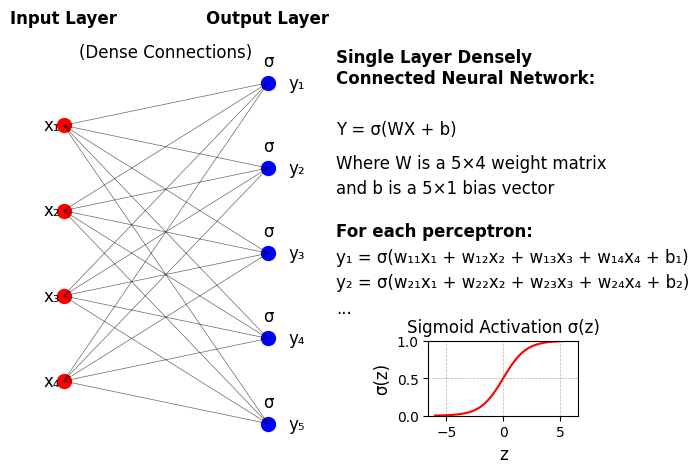

In [168]:
import matplotlib.pyplot as plot
import numpy as np

# Create the figure and axis
plot.figure(figsize=(7.5, 5))

# Draw the neuron network diagram
def draw_neuron_diagram():
    # Input nodes
    input_count = 4
    input_positions = [(1, 6 - i) for i in range(input_count)]
    for x, y in input_positions:
        plot.plot(x, y, 'ro', markersize=10)  # Red input nodes
    
    # Output layer neurons (single layer of perceptrons)
    output_count = 5
    output_positions = [(4, 6.5 - i) for i in range(output_count)]
    for x, y in output_positions:
        plot.plot(x, y, 'bo', markersize=10)  # Blue output neurons
    
    # Connections (lines) - fully connected
    # Input to output layer (densely connected)
    for input_pos in input_positions:
        for output_pos in output_positions:
            plot.plot([input_pos[0], output_pos[0]], [input_pos[1], output_pos[1]], 'k-', linewidth=0.5, alpha=0.6)
    
    # Labels
    input_labels = ['x₁', 'x₂', 'x₃', 'x₄']
    for (x, y), label in zip(input_positions, input_labels):
        plot.text(0.7, y, label, fontsize=12, verticalalignment='center')
    
    # Output layer labels
    output_labels = ['y₁', 'y₂', 'y₃', 'y₄', 'y₅']
    for (x, y), label in zip(output_positions, output_labels):
        plot.text(4.3, y, label, fontsize=12, verticalalignment='center')

    # Add sigma symbols to indicate activation functions
    for x, y in output_positions:
        plot.text(x, y+0.2, 'σ', fontsize=12, horizontalalignment='center')

    # Layer labels
    plot.text(1, 7.2, 'Input Layer', fontsize=12, horizontalalignment='center', fontweight='bold')
    plot.text(4, 7.2, 'Output Layer', fontsize=12, horizontalalignment='center', fontweight='bold')
    plot.text(2.5, 6.8, '(Dense Connections)', fontsize=12, horizontalalignment='center')

# Mathematical equation section
def draw_equation():
    x_loc = 5
    y_loc = 5.2
    fontsize = 12

    plot.text(x_loc, y_loc+1.3, 'Single Layer Densely \nConnected Neural Network:', fontsize=fontsize, fontweight='bold')
    
    plot.text(x_loc, y_loc+0.7, 'Y = σ(WX + b)', fontsize=fontsize)
    plot.text(x_loc, y_loc+0.3, 'Where W is a 5×4 weight matrix', fontsize=fontsize)
    plot.text(x_loc, y_loc+0.0, 'and b is a 5×1 bias vector', fontsize=fontsize)
    
    # Individual perceptron equations
    plot.text(x_loc, y_loc-0.5, 'For each perceptron:', fontsize=fontsize, fontweight='bold')
    plot.text(x_loc, y_loc-0.8, 'y₁ = σ(w₁₁x₁ + w₁₂x₂ + w₁₃x₃ + w₁₄x₄ + b₁)', fontsize=fontsize)
    plot.text(x_loc, y_loc-1.1, 'y₂ = σ(w₂₁x₁ + w₂₂x₂ + w₂₃x₃ + w₂₄x₄ + b₂)', fontsize=fontsize)
    plot.text(x_loc, y_loc-1.4, '...', fontsize=fontsize)
    
    # Activation function plot
    ax2 = plot.axes([0.6, 0.1, 0.2, 0.15])
    z = np.linspace(-6, 6, 100)
    sigmoid = 1 / (1 + np.exp(-z))
    ax2.plot(z, sigmoid, 'r-')
    ax2.set_title('Sigmoid Activation σ(z)', fontsize=fontsize)
    ax2.set_xlabel('z', fontsize=fontsize)
    ax2.set_ylabel('σ(z)', fontsize=fontsize)
    ax2.set_ylim(0, 1)
    ax2.grid(True, linestyle='--', linewidth=0.5)


# Plotting setup
plot.axis('off')
draw_neuron_diagram()
draw_equation()
plot.subplots_adjust(left=0.1, top=0.8, right=0.4, bottom=0.05)

# Comment out or adjust these if you don't have figures_dir defined
plot.savefig(figures_dir+'single_layer_perceptrons.pdf', dpi=600)


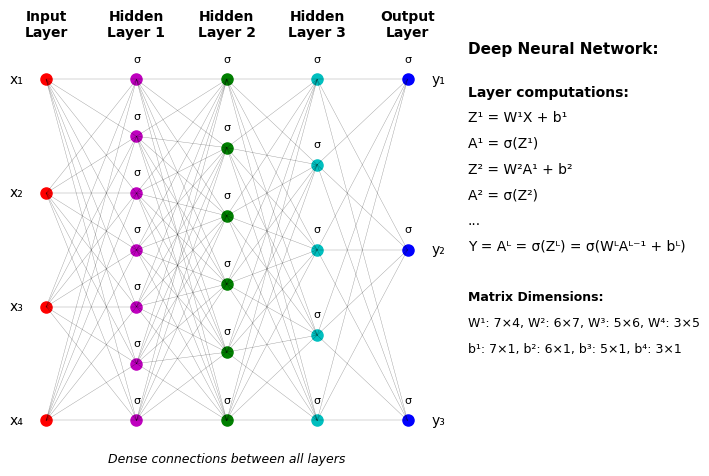

In [178]:
import matplotlib.pyplot as plot
import numpy as np

# Create the figure and axis
plot.figure(figsize=(7.5, 5))

# Draw the neuron network diagram
def draw_neuron_diagram():
    # Number of layers (including input and output)
    num_layers = 5
    
    # Neurons per layer (first is input, last is output)
    neurons_per_layer = [4, 7, 6, 5, 3]
    
    # Horizontal positions for each layer
    layer_positions = np.linspace(1, 4, num_layers)
    
    # Colors for each layer
    layer_colors = ['ro', 'mo', 'go', 'co', 'bo']
    
    # Store positions of neurons in each layer
    all_positions = []
    
    # Draw all layers
    for layer_idx, (x_pos, num_neurons, color) in enumerate(zip(layer_positions, neurons_per_layer, layer_colors)):
        # Calculate vertical positions for neurons in this layer
        if num_neurons == 1:
            y_positions = [4]
        else:
            y_positions = np.linspace(6, 2, num_neurons)
        
        # Store positions for connection drawing
        layer_positions_list = [(x_pos, y) for y in y_positions]
        all_positions.append(layer_positions_list)
        
        # Draw neurons for this layer
        for y in y_positions:
            plot.plot(x_pos, y, color, markersize=8)
            
        # Add sigma symbols to hidden and output layers
        if layer_idx > 0:  # Not for input layer
            for y in y_positions:
                plot.text(x_pos, y+0.2, 'σ', fontsize=8, horizontalalignment='center')
    
    # Draw connections between layers
    for i in range(len(all_positions)-1):
        source_layer = all_positions[i]
        target_layer = all_positions[i+1]
        
        for source_pos in source_layer:
            for target_pos in target_layer:
                plot.plot([source_pos[0], target_pos[0]], 
                         [source_pos[1], target_pos[1]], 
                         'k-', linewidth=0.3, alpha=0.4)
    
    # Add labels to input and output layers
    input_labels = ['x₁', 'x₂', 'x₃', 'x₄']
    for (x, y), label in zip(all_positions[0], input_labels):
        plot.text(x-0.3, y, label, fontsize=10, verticalalignment='center')
    
    output_labels = ['y₁', 'y₂', 'y₃']
    for (x, y), label in zip(all_positions[-1], output_labels):
        plot.text(x+0.2, y, label, fontsize=10, verticalalignment='center')

    # Layer labels
    layer_names = ['Input\nLayer', 'Hidden\nLayer 1', 'Hidden\nLayer 2', 'Hidden\nLayer 3', 'Output\nLayer']
    for i, x_pos in enumerate(layer_positions):
        plot.text(x_pos, 6.5, layer_names[i], fontsize=10, horizontalalignment='center', fontweight='bold')

    # Connections label
    plot.text(2.5, 1.5, 'Dense connections between all layers', fontsize=9, horizontalalignment='center', style='italic')

# Mathematical equation section
def draw_equation():
    x_loc = 4.5
    y_loc = 5
    fontsize = 10

    plot.text(x_loc, y_loc+1.3, 'Deep Neural Network:', fontsize=fontsize+1, fontweight='bold')
    
    # Forward propagation equations
    plot.text(x_loc, y_loc+0.8, 'Layer computations:', fontsize=fontsize, fontweight='bold')
    plot.text(x_loc, y_loc+0.5, 'Z¹ = W¹X + b¹', fontsize=fontsize)
    plot.text(x_loc, y_loc+0.2, 'A¹ = σ(Z¹)', fontsize=fontsize)
    plot.text(x_loc, y_loc-0.1, 'Z² = W²A¹ + b²', fontsize=fontsize)
    plot.text(x_loc, y_loc-0.4, 'A² = σ(Z²)', fontsize=fontsize)
    plot.text(x_loc, y_loc-0.7, '...', fontsize=fontsize)
    plot.text(x_loc, y_loc-1.0, 'Y = Aᴸ = σ(Zᴸ) = σ(WᴸAᴸ⁻¹ + bᴸ)', fontsize=fontsize)
    
    # Matrix dimensions
    plot.text(x_loc, y_loc-1.6, 'Matrix Dimensions:', fontsize=fontsize-1, fontweight='bold')
    plot.text(x_loc, y_loc-1.9, 'W¹: 7×4, W²: 6×7, W³: 5×6, W⁴: 3×5', fontsize=fontsize-1)
    plot.text(x_loc, y_loc-2.2, 'b¹: 7×1, b²: 6×1, b³: 5×1, b⁴: 3×1', fontsize=fontsize-1)
  

# Plotting setup
plot.axis('off')
draw_neuron_diagram()
draw_equation()
plot.subplots_adjust(left=0.07, top=0.85, right=0.6, bottom=0.1)

# Replace this with your actual figures_dir variable

plot.savefig(figures_dir+'deep_neural_network.pdf')


C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3492782186.py:104: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([output_pos[0], first_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3492782186.py:110: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([first_operators_x, second_operators_x],


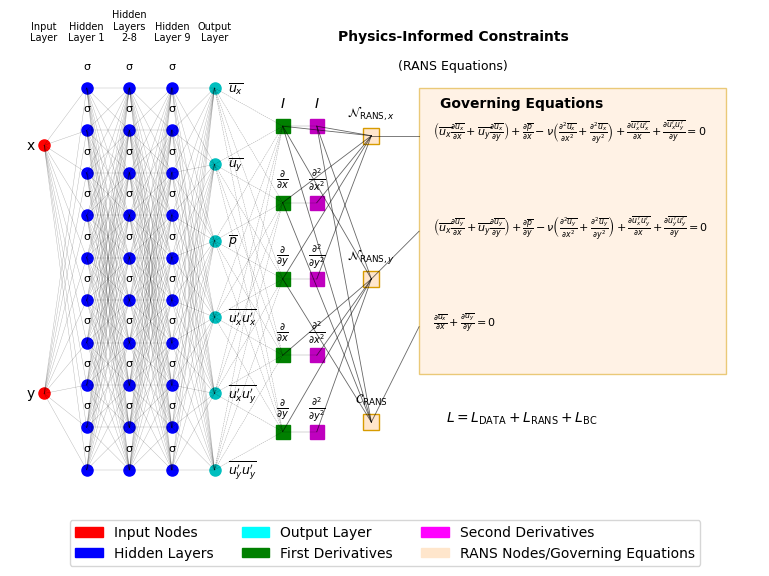

In [61]:
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.patches as mpatches

# Create the figure and axis
plot.figure(figsize=(7.5, 6))  # Width to accommodate equations

def draw_neuron_diagram():
    # Number of layers (including input and output)
    num_layers = 5
    
    # Neurons per layer: input[x,y], hidden layers, output[u_x, u_y, p, u_x'u_x', u_x'u_y', u_y'u_y']
    neurons_per_layer = [2, 10, 10, 10, 6]
    
    # Horizontal positions for each layer
    layer_positions = np.linspace(1, 3.5, num_layers)
    
    # Use consistent colors - make all hidden layers blue
    layer_colors = ['ro', 'bo', 'bo', 'bo', 'co']
    
    # Store positions of neurons in each layer
    all_positions = []
    
    # Draw neural network layers
    for layer_idx, (x_pos, num_neurons, color) in enumerate(zip(layer_positions, neurons_per_layer, layer_colors)):
        # Calculate vertical positions for neurons in this layer - evenly distribute
        if x_pos==1:
            y_positions = np.linspace(5.4, 2.8, num_neurons)
        else:
            y_positions = np.linspace(6, 2, num_neurons)
        
        # Store positions for connection drawing
        layer_positions_list = [(x_pos, y) for y in y_positions]
        all_positions.append(layer_positions_list)
        
        # Draw neurons for this layer
        for y in y_positions:
            plot.plot(x_pos, y, color, markersize=8)
            
        # Add activation symbols to hidden layers only (not input or output)
        if 0 < layer_idx < num_layers-1:
            for y in y_positions:
                plot.text(x_pos, y+0.2, 'σ', fontsize=8, horizontalalignment='center')
    
    # Draw connections between layers
    for i in range(len(all_positions)-1):
        source_layer = all_positions[i]
        target_layer = all_positions[i+1]
        
        for source_pos in source_layer:
            for target_pos in target_layer:
                plot.plot([source_pos[0], target_pos[0]], 
                         [source_pos[1], target_pos[1]], 
                         'k-', linewidth=0.3, alpha=0.3)
    
    # Add labels to input layer
    input_labels = ['x', 'y']
    for (x, y), label in zip(all_positions[0], input_labels):
        plot.text(x-0.25, y, label, fontsize=10, verticalalignment='center')
    
    # Add labels to output layer
    output_labels = ['$\overline{u_x}$', '$\overline{u_y}$', '$\overline{p}$', 
                     '$\overline{u_x^\prime u_x^\prime}$', '$\overline{u_x^\prime u_y^\prime}$', 
                     '$\overline{u_y^\prime u_y^\prime}$']
    for (x, y), label in zip(all_positions[-1], output_labels):
        plot.text(x+0.2, y, label, fontsize=9, verticalalignment='center')

    # Layer labels
    layer_names = ['Input\nLayer', 'Hidden\nLayer 1', 'Hidden\nLayers\n2-8', 'Hidden\nLayer 9', 'Output\nLayer']
    for i, x_pos in enumerate(layer_positions):
        plot.text(x_pos, 6.5, layer_names[i], fontsize=7, horizontalalignment='center',)
    
    # First-order derivative operators including identity
    first_operators_x = 4.5
    first_derivs_y = np.linspace(5.6, 2.4, 5)  # 5 operators including identity
    first_operators = ['$I$', '$\\frac{\partial}{\partial x}$', '$\\frac{\partial}{\partial y}$', 
                      '$\\frac{\partial}{\partial x}$', '$\\frac{\partial}{\partial y}$']
    
    # Draw first-order operator nodes (including identity as the first operator in same column)
    for i, y_pos in enumerate(first_derivs_y):
        if i == 0:  # Identity operator - same color as derivatives
            plot.plot(first_operators_x, y_pos, 'gs', markersize=10)
        else:
            plot.plot(first_operators_x, y_pos, 'gs', markersize=10)
        plot.text(first_operators_x, y_pos+0.2, first_operators[i], fontsize=10, horizontalalignment='center')
    
    # Second-order derivative operators including identity
    second_operators_x = 5.0
    second_derivs_y = np.linspace(5.6, 2.4, 5)  # 5 operators including identity
    second_operators = ['$I$', '$\\frac{\partial^2}{\partial x^2}$', '$\\frac{\partial^2}{\partial y^2}$', 
                       '$\\frac{\partial^2}{\partial x^2}$', '$\\frac{\partial^2}{\partial y^2}$']
    
    # Draw second-order operator nodes (identity as first operator)
    for i, y_pos in enumerate(second_derivs_y):
        if i == 0:  # Identity operator - same color as derivatives
            plot.plot(second_operators_x, y_pos, 'ms', markersize=10)
        else:
            plot.plot(second_operators_x, y_pos, 'ms', markersize=10)
        plot.text(second_operators_x, y_pos+0.2, second_operators[i], fontsize=10, horizontalalignment='center')
    
    # Draw connections from outputs to first derivative operators
    for output_pos in all_positions[-1]:
        for op_y in first_derivs_y:
            plot.plot([output_pos[0], first_operators_x], 
                     [output_pos[1], op_y], 
                     'k-', linewidth=0.3, alpha=0.4, linestyle='--')
    
    # Connect first derivatives to second derivatives
    for i, first_y in enumerate(first_derivs_y):
        plot.plot([first_operators_x, second_operators_x], 
                 [first_y, second_derivs_y[i]], 
                 'k-', linewidth=0.3, alpha=0.4, linestyle='-')
    
    # Draw RANS equation nodes (x-momentum, y-momentum, continuity)
    rans_x = 5.8
    rans_y_positions = [5.5, 4.0, 2.5]
    
    # New equation labels
    rans_labels = ['$\mathcal{N}_{\mathrm{RANS},x}$', '$\mathcal{N}_{\mathrm{RANS},y}$', '$\mathcal{C}_{\mathrm{RANS}}$']
    # For changing RANS markers to orange squares
    for y_pos, label in zip(rans_y_positions, rans_labels):
        plot.plot(rans_x, y_pos, 's', color='#FFE6CC', markersize=12, markeredgecolor='#D79B00')
        plot.text(rans_x, y_pos+0.2, label, fontsize=9, horizontalalignment='center', fontweight='bold')
    
    # Connect first derivative operators to RANS nodes
    for i, op_y in enumerate(first_derivs_y):
        if i == 0:  # Identity operator connects to all RANS nodes
            for rans_y in rans_y_positions:
                plot.plot([first_operators_x, rans_x], [op_y, rans_y], 'k-', linewidth=0.6, alpha=0.6)
        elif i < 3:  # First two derivatives connect to x-momentum
            plot.plot([first_operators_x, rans_x], [op_y, rans_y_positions[0]], 'k-', linewidth=0.6, alpha=0.6)
        else:  # Last two derivatives connect to y-momentum
            plot.plot([first_operators_x, rans_x], [op_y, rans_y_positions[1]], 'k-', linewidth=0.6, alpha=0.6)
    
    # Connect second derivative operators to RANS nodes
    for i, op_y in enumerate(second_derivs_y):
        if i == 0:  # Identity operator connects to all RANS nodes
            for rans_y in rans_y_positions:
                plot.plot([second_operators_x, rans_x], [op_y, rans_y], 'k-', linewidth=0.6, alpha=0.6)
        elif i < 3:  # First two operators connect to x-momentum
            plot.plot([second_operators_x, rans_x], [op_y, rans_y_positions[0]], 'k-', linewidth=0.6, alpha=0.6)
        else:  # Last two operators connect to y-momentum
            plot.plot([second_operators_x, rans_x], [op_y, rans_y_positions[1]], 'k-', linewidth=0.6, alpha=0.6)
    
    # Special connections for continuity equation (just first derivatives)
    plot.plot([first_operators_x, rans_x], [first_derivs_y[1], rans_y_positions[2]], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([first_operators_x, rans_x], [first_derivs_y[2], rans_y_positions[2]], 'k-', linewidth=0.6, alpha=0.6)

    # Label the physics-informed part
    plot.text(7, 6.5, 'Physics-Informed Constraints', fontsize=10, fontweight='bold', horizontalalignment='center')
    plot.text(7, 6.2, '(RANS Equations)', fontsize=9, horizontalalignment='center')
    
    # Add governing equations on right side
    eq_x = 7
    eq_y = 4.0
    
    # Create light orange rectangle for equation area (different from input layer color)
    eq_rect = plot.Rectangle((eq_x-0.5, eq_y-1), 4.5, 3.0, facecolor='#FFE6CC', alpha=0.5, edgecolor='#D79B00', linewidth=1)
    plot.gca().add_patch(eq_rect)
    
    # Add the equations
    # Fixed equations with proper LaTeX syntax
    plot.text(eq_x-0.3, eq_y+1.5, r"$\left(\overline{u_x}\frac{\partial \overline{u_x}}{\partial x} + \overline{u_y}\frac{\partial \overline{u_x}}{\partial y}\right) + \frac{\partial \overline{p}}{\partial x} -\nu \left(\frac{\partial^2\overline{u_x}}{\partial x^2} +\frac{\partial^2\overline{u_x}}{\partial y^2}\right) + \frac{\partial \overline{u_x^\prime u_x^\prime}}{\partial x} + \frac{\partial \overline{u_x^\prime u_y^\prime}}{\partial y}=0$", fontsize=8)

    plot.text(eq_x-0.3, eq_y+0.5, r"$\left(\overline{u_x}\frac{\partial \overline{u_y}}{\partial x} + \overline{u_y}\frac{\partial \overline{u_y}}{\partial y}\right) + \frac{\partial \overline{p}}{\partial y} -\nu \left(\frac{\partial^2\overline{u_y}}{\partial x^2} +\frac{\partial^2\overline{u_y}}{\partial y^2}\right) + \frac{\partial \overline{u_x^\prime u_y^\prime}}{\partial x} + \frac{\partial \overline{u_y^\prime u_y^\prime}}{\partial y}=0$", fontsize=8)

    plot.text(eq_x-0.3, eq_y-0.5, r"$\frac{\partial \overline{u_x}}{\partial x} + \frac{\partial \overline{u_y}}{\partial y}=0$", fontsize=8)
    # Add connecting lines from RANS to equations
    plot.plot([rans_x, eq_x-0.5], [rans_y_positions[0], eq_y+1.5], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([rans_x, eq_x-0.5], [rans_y_positions[1], eq_y+0.5], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([rans_x, eq_x-0.5], [rans_y_positions[2], eq_y-0.5], 'k-', linewidth=0.6, alpha=0.6)
    
    # Add text for governing equations
    plot.text(eq_x+1.0, eq_y+1.8, 'Governing Equations', fontsize=10, fontweight='bold', horizontalalignment='center')
    
    # Add loss function label
    plot.text(eq_x+1, eq_y-1.5, '$L = L_{\mathrm{DATA}} + L_{\mathrm{RANS}}+ L_{\mathrm{BC}}$', fontsize=10, horizontalalignment='center')

# Plotting setup
plot.axis('off')
draw_neuron_diagram()
plot.subplots_adjust(left=0.0, top=0.85, right=1, bottom=0.15)

# Add legend
red_patch = mpatches.Patch(color='red', label='Input Layer')
blue_patch = mpatches.Patch(color='blue', label='Hidden Layers')
cyan_patch = mpatches.Patch(color='cyan', label='Output Layer')
green_patch = mpatches.Patch(color='green', label='First Derivatives')
magenta_patch = mpatches.Patch(color='magenta', label='Second Derivatives')
red_patch = mpatches.Patch(color='red', label='Input Nodes')
rans_patch = mpatches.Patch(color='#FFE6CC', label='RANS Nodes/Governing Equations')

plot.legend(handles=[red_patch, blue_patch, cyan_patch, green_patch, magenta_patch, rans_patch], 
           loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.2))

# Replace this with your actual figures_dir variable if needed

figures_dir = 'F:/projects/paper_figures/t010_f2/thesis/'
plot.savefig(figures_dir+'pinn_rans_2d_updated.pdf', dpi=600,)
plot.savefig(figures_dir+'pinn_rans_2d_updated.png', dpi=600,)

C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3895174013.py:102: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([output_pos[0], first_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3895174013.py:106: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([output_pos[0], first_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3895174013.py:112: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([first_operators_x, second_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3895174013.py:117: UserWarning: linestyle is redundantly defined by the 'linestyle' key

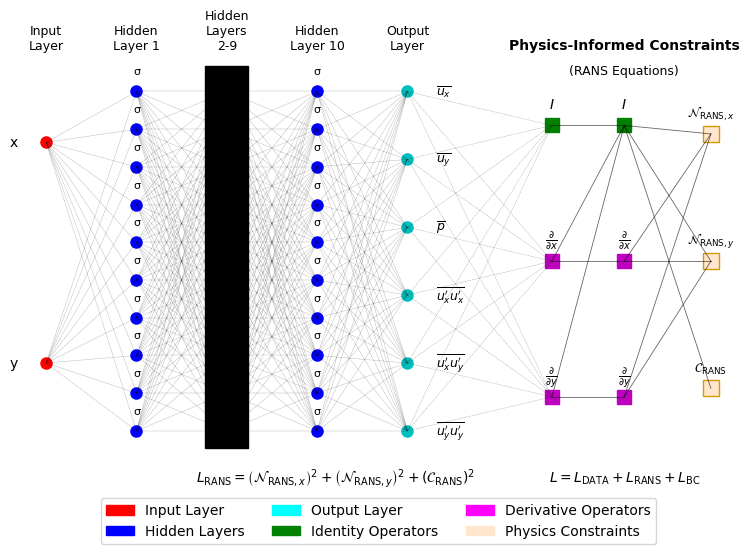

In [90]:
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.patches as mpatches

# Create the figure and axis
plot.figure(figsize=(7.5, 6))  # Width to accommodate equations

def draw_neuron_diagram():
    # Number of layers (including input and output)
    num_layers = 5
    
    # Neurons per layer: input[x,y], hidden layers, output[u_x, u_y, p, u_x'u_x', u_x'u_y', u_y'u_y']
    neurons_per_layer = [2, 10, 10, 10, 6]
    
    # Horizontal positions for each layer
    layer_positions = np.linspace(1, 3.5, num_layers)
    
    # Use consistent colors - make all hidden layers blue
    layer_colors = ['ro', 'bo', 'bo', 'bo', 'co']
    
    # Store positions of neurons in each layer
    all_positions = []
    
    # Draw neural network layers
    for layer_idx, (x_pos, num_neurons, color) in enumerate(zip(layer_positions, neurons_per_layer, layer_colors)):
        # Calculate vertical positions for neurons in this layer - evenly distribute
        if x_pos==1:
            y_positions = np.linspace(5.4, 2.8, num_neurons)
        else:
            y_positions = np.linspace(6, 2, num_neurons)
        
        # Store positions for connection drawing
        layer_positions_list = [(x_pos, y) for y in y_positions]
        all_positions.append(layer_positions_list)
        
        # Draw neurons for this layer
        for y in y_positions:
            plot.plot(x_pos, y, color, markersize=8)
            
        # Add activation symbols to hidden layers only (not input or output)
        if 0 < layer_idx < num_layers-1:
            for y in y_positions:
                plot.text(x_pos, y+0.2, 'σ', fontsize=8, horizontalalignment='center')
    
    # Draw connections between layers
    for i in range(len(all_positions)-1):
        source_layer = all_positions[i]
        target_layer = all_positions[i+1]
        
        for source_pos in source_layer:
            for target_pos in target_layer:
                plot.plot([source_pos[0], target_pos[0]], 
                         [source_pos[1], target_pos[1]], 
                         'k-', linewidth=0.3, alpha=0.3)
    
    black_box = plot.Rectangle((layer_positions[2]-0.15, 1.8), 0.3, 4.5, facecolor='black', alpha=1.0, edgecolor='black', linewidth=1, zorder=3)
    plot.gca().add_patch(black_box)
    
    # Add labels to input layer
    input_labels = ['x', 'y']
    for (x, y), label in zip(all_positions[0], input_labels):
        plot.text(x-0.25, y, label, fontsize=10, verticalalignment='center')
    
    # Add labels to output layer
    output_labels = ['$\overline{u_x}$', '$\overline{u_y}$', '$\overline{p}$', 
                     '$\overline{u_x^\prime u_x^\prime}$', '$\overline{u_x^\prime u_y^\prime}$', 
                     '$\overline{u_y^\prime u_y^\prime}$']
    for (x, y), label in zip(all_positions[-1], output_labels):
        plot.text(x+0.2, y, label, fontsize=9, verticalalignment='center')

    # Layer labels
    layer_names = ['Input\nLayer', 'Hidden\nLayer 1', 'Hidden\nLayers\n2-9', 'Hidden\nLayer 10', 'Output\nLayer']
    for i, x_pos in enumerate(layer_positions):
        plot.text(x_pos, 6.5, layer_names[i], fontsize=9, horizontalalignment='center',)
    
    # First column - operators
    first_operators_x = 4.5
    first_derivs_y = np.linspace(5.6, 2.4, 3)  # 3 operators
    first_operators = ['$I$', '$\\frac{\partial}{\partial x}$', '$\\frac{\partial}{\partial y}$']
    first_operators_colors = ['gs', 'ms', 'ms']  # Identity green, derivatives magenta
    
    # Draw first column of operator nodes
    for i, y_pos in enumerate(first_derivs_y):
        plot.plot(first_operators_x, y_pos, first_operators_colors[i], markersize=10)
        plot.text(first_operators_x, y_pos+0.2, first_operators[i], fontsize=10, horizontalalignment='center')
    
    # Second column - operators
    second_operators_x = 5.0
    second_derivs_y = np.linspace(5.6, 2.4, 3)  
    second_operators = ['$I$', '$\\frac{\partial}{\partial x}$', '$\\frac{\partial}{\partial y}$']
    second_operators_colors = ['gs', 'ms', 'ms']  # Identity green, derivatives magenta
    
    # Draw second column of operator nodes
    for i, y_pos in enumerate(second_derivs_y):
        plot.plot(second_operators_x, y_pos, second_operators_colors[i], markersize=10)
        plot.text(second_operators_x, y_pos+0.2, second_operators[i], fontsize=10, horizontalalignment='center')
    
    # Draw connections from outputs to first column (all outputs to all derivatives)
    for output_pos in all_positions[-1]:
        for i, op_y in enumerate(first_derivs_y):
            if i == 0:  # Identity
                plot.plot([output_pos[0], first_operators_x], 
                        [output_pos[1], op_y], 
                        'k-', linewidth=0.3, alpha=0.4, linestyle='--')
            else:  # Derivatives
                plot.plot([output_pos[0], first_operators_x], 
                        [output_pos[1], op_y], 
                        'k-', linewidth=0.3, alpha=0.4, linestyle='--')
    
    # Connect first column operators to second column operators
    # Identity to identity
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[0], second_derivs_y[0]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # d/dx to d/dx
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[1], second_derivs_y[1]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # d/dy to d/dy
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[2], second_derivs_y[2]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # ADD NEW CONNECTIONS: d/dx to Identity and d/dy to Identity
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[1], second_derivs_y[0]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[2], second_derivs_y[0]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # Draw RANS equation nodes (x-momentum, y-momentum, continuity)
    rans_x = 5.6
    rans_y_positions = [5.5, 4.0, 2.5]
    
    # RANS equation labels
    rans_labels = ['$\mathcal{N}_{\mathrm{RANS},x}$', '$\mathcal{N}_{\mathrm{RANS},y}$', '$\mathcal{C}_{\mathrm{RANS}}$']
    
    # Draw RANS nodes
    for y_pos, label in zip(rans_y_positions, rans_labels):
        plot.plot(rans_x, y_pos, 's', color='#FFE6CC', markersize=12, markeredgecolor='#D79B00')
        plot.text(rans_x, y_pos+0.2, label, fontsize=9, horizontalalignment='center', fontweight='bold')
    
    # Connect second column operators to RANS nodes
    # Identity to all RANS nodes
    plot.plot([second_operators_x, rans_x], [second_derivs_y[0], rans_y_positions[0]], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([second_operators_x, rans_x], [second_derivs_y[0], rans_y_positions[1]], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([second_operators_x, rans_x], [second_derivs_y[0], rans_y_positions[2]], 'k-', linewidth=0.6, alpha=0.6)
    
    # d/dx to N_RANS,x and N_RANS,y only
    plot.plot([second_operators_x, rans_x], [second_derivs_y[1], rans_y_positions[0]], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([second_operators_x, rans_x], [second_derivs_y[1], rans_y_positions[1]], 'k-', linewidth=0.6, alpha=0.6)
    
    # d/dy to N_RANS,x and N_RANS,y only
    plot.plot([second_operators_x, rans_x], [second_derivs_y[2], rans_y_positions[0]], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([second_operators_x, rans_x], [second_derivs_y[2], rans_y_positions[1]], 'k-', linewidth=0.6, alpha=0.6)
    
    # Label the physics-informed part
    plot.text(5, 6.5, 'Physics-Informed Constraints', fontsize=10, fontweight='bold', horizontalalignment='center')
    plot.text(5, 6.2, '(RANS Equations)', fontsize=9, horizontalalignment='center')

    plot.text(3, 1.4, r'$L_{\mathrm{RANS}} = \left(\mathcal{N}_{\mathrm{RANS},x}\right)^2 + \left(\mathcal{N}_{\mathrm{RANS},y}\right)^2 + \left(\mathcal{C}_{\mathrm{RANS}}\right)^2$', fontsize=10, horizontalalignment='center')
    
    # Add loss function label
    plot.text(5, 1.4, '$L = L_{\mathrm{DATA}} + L_{\mathrm{RANS}}+ L_{\mathrm{BC}}$', fontsize=10, horizontalalignment='center')

# Plotting setup
plot.axis('off')
draw_neuron_diagram()
plot.subplots_adjust(left=0.025, top=0.85, right=1, bottom=0.15)

# Add legend
red_patch = mpatches.Patch(color='red', label='Input Layer')
blue_patch = mpatches.Patch(color='blue', label='Hidden Layers')
cyan_patch = mpatches.Patch(color='cyan', label='Output Layer')
green_patch = mpatches.Patch(color='green', label='Identity Operators')
magenta_patch = mpatches.Patch(color='magenta', label='Derivative Operators')
rans_patch = mpatches.Patch(color='#FFE6CC', label='Physics Constraints')

plot.legend(handles=[red_patch, blue_patch, cyan_patch, green_patch, magenta_patch, rans_patch], 
           loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.2))

# Replace this with your actual figures_dir variable if needed
figures_dir = 'F:/projects/paper_figures/t010_f2/thesis/'
plot.savefig(figures_dir+'pinn_rans_2d_updated.pdf', dpi=600)
plot.savefig(figures_dir+'pinn_rans_2d_updated.png', dpi=600)

C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\1797996676.py:120: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([output_pos[0], first_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\1797996676.py:124: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([output_pos[0], first_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\1797996676.py:130: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([first_operators_x, second_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\1797996676.py:135: UserWarning: linestyle is redundantly defined by the 'linestyle' key

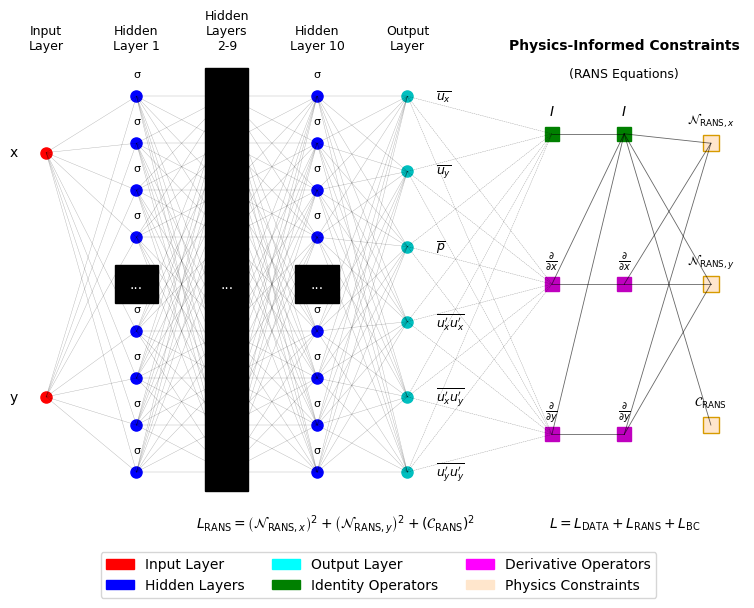

In [134]:
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.patches as mpatches

# Create the figure and axis
plot.figure(figsize=(7.5, 6))  # Width to accommodate equations

def draw_neuron_diagram():
    # Number of layers (including input and output)
    num_layers = 5
    
    # Neurons per layer: input[x,y], hidden layers, output[u_x, u_y, p, u_x'u_x', u_x'u_y', u_y'u_y']
    neurons_per_layer = [2, 8, 8, 8, 6]  # Changed to 8 for hidden layers (4 above + 4 below)
    
    # Horizontal positions for each layer
    layer_positions = np.linspace(1, 3.5, num_layers)
    
    # Use consistent colors - make all hidden layers blue
    layer_colors = ['ro', 'bo', 'bo', 'bo', 'co']
    
    # Store positions of neurons in each layer
    all_positions = []
    
    # Draw neural network layers
    for layer_idx, (x_pos, num_neurons, color) in enumerate(zip(layer_positions, neurons_per_layer, layer_colors)):
        # Create positions for this layer
        if layer_idx == 0:  # Input layer
            y_positions = np.linspace(5.4, 2.8, num_neurons)
        elif layer_idx > 0 and layer_idx < num_layers - 1:  # Hidden layers - split into two groups
            top_positions = np.linspace(6, 4.5, 4)  # 4 nodes at the top
            bottom_positions = np.linspace(3.5, 2, 4)  # 4 nodes at the bottom
            y_positions = np.concatenate([top_positions, bottom_positions])
        else:  # Output layer
            y_positions = np.linspace(6, 2, num_neurons)
        
        # Store positions for connection drawing
        layer_positions_list = [(x_pos, y) for y in y_positions]
        all_positions.append(layer_positions_list)
        
        # Draw neurons for this layer
        for y in y_positions:
            plot.plot(x_pos, y, color, markersize=8)
            
        # Add activation symbols to hidden layers only (not input or output)
        if 0 < layer_idx < num_layers-1:
            for y in y_positions:
                plot.text(x_pos, y+0.2, 'σ', fontsize=8, horizontalalignment='center')
    
    # Draw connections between layers
    for i in range(len(all_positions)-1):
        source_layer = all_positions[i]
        target_layer = all_positions[i+1]
        
        for source_pos in source_layer:
            for target_pos in target_layer:
                plot.plot([source_pos[0], target_pos[0]], 
                         [source_pos[1], target_pos[1]], 
                         'k-', linewidth=0.3, alpha=0.3)
    
    # Add black boxes with "..." in hidden layers
    for i in range(1, num_layers-1):
        black_box = plot.Rectangle((layer_positions[i]-0.15, 3.8), 0.3, 0.4, 
                                  facecolor='black', alpha=1.0, 
                                  edgecolor='black', linewidth=1, zorder=3)
        plot.gca().add_patch(black_box)
        # Add "..." text in white
        plot.text(layer_positions[i], 4, "...", color='white', 
                 horizontalalignment='center', verticalalignment='center', 
                 fontsize=10, zorder=4)
    
    # Add black box for hidden layers 2-9
    black_box = plot.Rectangle((layer_positions[2]-0.15, 1.8), 0.3, 4.5, 
                              facecolor='black', alpha=1.0, 
                              edgecolor='black', linewidth=1, zorder=3)
    plot.gca().add_patch(black_box)
    
    # Add labels to input layer
    input_labels = ['x', 'y']
    for (x, y), label in zip(all_positions[0], input_labels):
        plot.text(x-0.25, y, label, fontsize=10, verticalalignment='center')
    
    # Add labels to output layer
    output_labels = ['$\overline{u_x}$', '$\overline{u_y}$', '$\overline{p}$', 
                     '$\overline{u_x^\prime u_x^\prime}$', '$\overline{u_x^\prime u_y^\prime}$', 
                     '$\overline{u_y^\prime u_y^\prime}$']
    for (x, y), label in zip(all_positions[-1], output_labels):
        plot.text(x+0.2, y, label, fontsize=9, verticalalignment='center')

    # Layer labels
    layer_names = ['Input\nLayer', 'Hidden\nLayer 1', 'Hidden\nLayers\n2-9', 'Hidden\nLayer 10', 'Output\nLayer']
    for i, x_pos in enumerate(layer_positions):
        plot.text(x_pos, 6.5, layer_names[i], fontsize=9, horizontalalignment='center',)
    
    # First column - operators
    first_operators_x = 4.5
    first_derivs_y = np.linspace(5.6, 2.4, 3)  # 3 operators
    first_operators = ['$I$', '$\\frac{\partial}{\partial x}$', '$\\frac{\partial}{\partial y}$']
    first_operators_colors = ['gs', 'ms', 'ms']  # Identity green, derivatives magenta
    
    # Draw first column of operator nodes
    for i, y_pos in enumerate(first_derivs_y):
        plot.plot(first_operators_x, y_pos, first_operators_colors[i], markersize=10)
        plot.text(first_operators_x, y_pos+0.2, first_operators[i], fontsize=10, horizontalalignment='center')
    
    # Second column - operators
    second_operators_x = 5.0
    second_derivs_y = np.linspace(5.6, 2.4, 3)  
    second_operators = ['$I$', '$\\frac{\partial}{\partial x}$', '$\\frac{\partial}{\partial y}$']
    second_operators_colors = ['gs', 'ms', 'ms']  # Identity green, derivatives magenta
    
    # Draw second column of operator nodes
    for i, y_pos in enumerate(second_derivs_y):
        plot.plot(second_operators_x, y_pos, second_operators_colors[i], markersize=10)
        plot.text(second_operators_x, y_pos+0.2, second_operators[i], fontsize=10, horizontalalignment='center')
    
    # Draw connections from outputs to first column (all outputs to all derivatives)
    for output_pos in all_positions[-1]:
        for i, op_y in enumerate(first_derivs_y):
            if i == 0:  # Identity
                plot.plot([output_pos[0], first_operators_x], 
                        [output_pos[1], op_y], 
                        'k-', linewidth=0.3, alpha=0.4, linestyle='--')
            else:  # Derivatives
                plot.plot([output_pos[0], first_operators_x], 
                        [output_pos[1], op_y], 
                        'k-', linewidth=0.3, alpha=0.4, linestyle='--')
    
    # Connect first column operators to second column operators
    # Identity to identity
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[0], second_derivs_y[0]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # d/dx to d/dx
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[1], second_derivs_y[1]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # d/dy to d/dy
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[2], second_derivs_y[2]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # ADD NEW CONNECTIONS: d/dx to Identity and d/dy to Identity
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[1], second_derivs_y[0]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[2], second_derivs_y[0]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # Draw RANS equation nodes (x-momentum, y-momentum, continuity)
    rans_x = 5.6
    rans_y_positions = [5.5, 4.0, 2.5]
    
    # RANS equation labels
    rans_labels = ['$\mathcal{N}_{\mathrm{RANS},x}$', '$\mathcal{N}_{\mathrm{RANS},y}$', '$\mathcal{C}_{\mathrm{RANS}}$']
    
    # Draw RANS nodes
    for y_pos, label in zip(rans_y_positions, rans_labels):
        plot.plot(rans_x, y_pos, 's', color='#FFE6CC', markersize=12, markeredgecolor='#D79B00')
        plot.text(rans_x, y_pos+0.2, label, fontsize=9, horizontalalignment='center', fontweight='bold')
    
    # Connect second column operators to RANS nodes
    # Identity to all RANS nodes
    plot.plot([second_operators_x, rans_x], [second_derivs_y[0], rans_y_positions[0]], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([second_operators_x, rans_x], [second_derivs_y[0], rans_y_positions[1]], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([second_operators_x, rans_x], [second_derivs_y[0], rans_y_positions[2]], 'k-', linewidth=0.6, alpha=0.6)
    
    # d/dx to N_RANS,x and N_RANS,y only
    plot.plot([second_operators_x, rans_x], [second_derivs_y[1], rans_y_positions[0]], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([second_operators_x, rans_x], [second_derivs_y[1], rans_y_positions[1]], 'k-', linewidth=0.6, alpha=0.6)
    
    # d/dy to N_RANS,x and N_RANS,y only
    plot.plot([second_operators_x, rans_x], [second_derivs_y[2], rans_y_positions[0]], 'k-', linewidth=0.6, alpha=0.6)
    plot.plot([second_operators_x, rans_x], [second_derivs_y[2], rans_y_positions[1]], 'k-', linewidth=0.6, alpha=0.6)
    
    # Label the physics-informed part
    plot.text(5, 6.5, 'Physics-Informed Constraints', fontsize=10, fontweight='bold', horizontalalignment='center')
    plot.text(5, 6.2, '(RANS Equations)', fontsize=9, horizontalalignment='center')

    plot.text(3, 1.4, r'$L_{\mathrm{RANS}} = \left(\mathcal{N}_{\mathrm{RANS},x}\right)^2 + \left(\mathcal{N}_{\mathrm{RANS},y}\right)^2 + \left(\mathcal{C}_{\mathrm{RANS}}\right)^2$', fontsize=10, horizontalalignment='center')
    
    # Add loss function label
    plot.text(5, 1.4, '$L = L_{\mathrm{DATA}} + L_{\mathrm{RANS}}+ L_{\mathrm{BC}}$', fontsize=10, horizontalalignment='center')

# Plotting setup
plot.axis('off')
draw_neuron_diagram()
plot.subplots_adjust(left=0.025, top=0.925, right=1, bottom=0.15)

# Add legend
red_patch = mpatches.Patch(color='red', label='Input Layer')
blue_patch = mpatches.Patch(color='blue', label='Hidden Layers')
cyan_patch = mpatches.Patch(color='cyan', label='Output Layer')
green_patch = mpatches.Patch(color='green', label='Identity Operators')
magenta_patch = mpatches.Patch(color='magenta', label='Derivative Operators')
rans_patch = mpatches.Patch(color='#FFE6CC', label='Physics Constraints')

plot.legend(handles=[red_patch, blue_patch, cyan_patch, green_patch, magenta_patch, rans_patch], 
           loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.2))

# Replace this with your actual figures_dir variable if needed
figures_dir = 'F:/projects/paper_figures/t010_f2/thesis/'
plot.savefig(figures_dir+'pinn_rans_2d_updated.pdf', dpi=600)
plot.savefig(figures_dir+'pinn_rans_2d_updated.png', dpi=600)

C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3398344278.py:123: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([output_pos[0], first_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3398344278.py:129: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([first_operators_x, second_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3398344278.py:134: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plot.plot([first_operators_x, second_operators_x],
C:\Users\Chris\AppData\Local\Temp\ipykernel_15828\3398344278.py:139: UserWarning: linestyle is redundantly defined by the 'linestyle

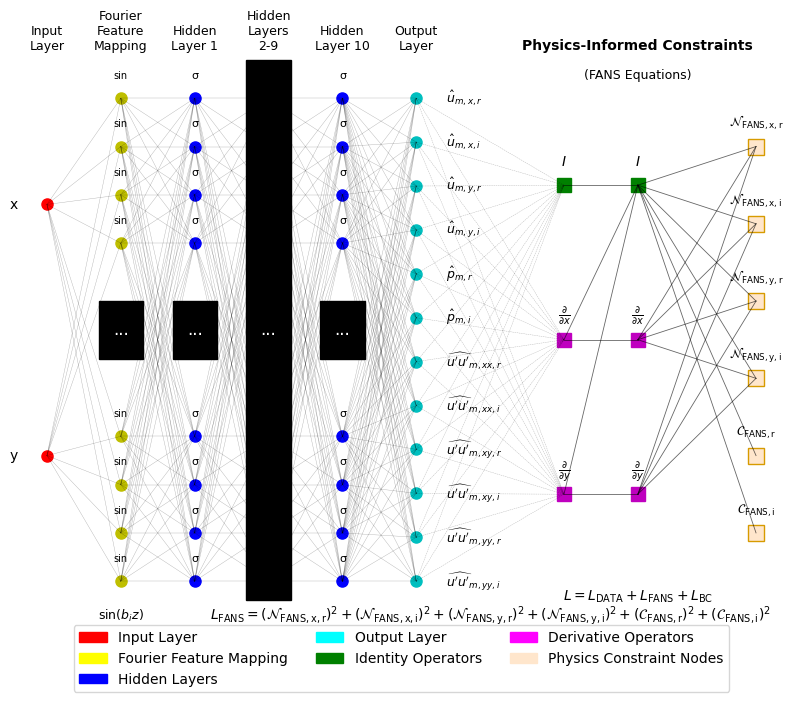

In [130]:
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.patches as mpatches

# Create the figure and axis
plot.figure(figsize=(8, 7))  # Increased size to accommodate more nodes

def draw_neuron_diagram():
    # Number of layers (including input and output)
    num_layers = 6  # Increased to add Fourier feature mapping layer
    
    # Neurons per layer: input[x,y], Fourier layer (4+4=8), hidden layers (8), output (12 nodes)
    neurons_per_layer = [2, 8, 8, 8, 8, 12]
    
    # Horizontal positions for each layer
    layer_positions = np.linspace(1, 3.5, num_layers)
    
    # Use consistent colors - make all hidden layers blue, Fourier layer orange
    layer_colors = ['ro', 'yo', 'bo', 'bo', 'bo', 'co']  # Added 'yo' for Fourier layer
    
    # Store positions of neurons in each layer
    all_positions = []
    
    # Draw neural network layers
    for layer_idx, (x_pos, num_neurons, color) in enumerate(zip(layer_positions, neurons_per_layer, layer_colors)):
        # Calculate vertical positions for neurons in this layer - evenly distribute
        if x_pos == 1:  # Input layer
            y_positions = np.linspace(5.4, 2.8, num_neurons)
        elif layer_idx == 1:  # Fourier feature mapping layer
            # 4 nodes at top, black box with ... in the middle, 4 nodes at bottom
            top_positions = np.linspace(6.5, 5.0, 4)
            bottom_positions = np.linspace(3.0, 1.5, 4)
            y_positions = np.concatenate([top_positions, bottom_positions])
        elif 1 < layer_idx < num_layers-1:  # Hidden layers with 8 nodes
            # 4 nodes at top, black box with ... in the middle, 4 nodes at bottom
            top_positions = np.linspace(6.5, 5.0, 4)
            bottom_positions = np.linspace(3.0, 1.5, 4)
            y_positions = np.concatenate([top_positions, bottom_positions])
        else:  # Output layer
            y_positions = np.linspace(6.5, 1.5, num_neurons)  # Expanded range for more nodes
        
        # Store positions for connection drawing
        layer_positions_list = [(x_pos, y) for y in y_positions]
        all_positions.append(layer_positions_list)
        
        # Draw neurons for this layer
        for y in y_positions:
            plot.plot(x_pos, y, color, markersize=8)
            
        # Add activation symbols to layers
        if layer_idx == 1:  # Fourier feature mapping layer
            for y in y_positions:
                plot.text(x_pos, y+0.2, 'sin', fontsize=7, horizontalalignment='center')
        elif 1 < layer_idx < num_layers-1:  # Hidden layers
            for y in y_positions:
                plot.text(x_pos, y+0.2, 'σ', fontsize=8, horizontalalignment='center')
    
    # Draw connections between layers
    for i in range(len(all_positions)-1):
        source_layer = all_positions[i]
        target_layer = all_positions[i+1]
        
        for source_pos in source_layer:
            for target_pos in target_layer:
                plot.plot([source_pos[0], target_pos[0]], 
                         [source_pos[1], target_pos[1]], 
                         'k-', linewidth=0.3, alpha=0.3)
    
    # Add black boxes to all hidden layers
    for i in [1,2,4]:  # For layers 2, 3, 4 (all hidden layers)
        black_box = plot.Rectangle((layer_positions[i]-0.15, 3.8), 0.3, 0.6, facecolor='black', alpha=1.0, edgecolor='black', linewidth=1, zorder=3)
        plot.gca().add_patch(black_box)
        plot.text(layer_positions[i], 4.1, "...", color='white', fontsize=12, horizontalalignment='center', verticalalignment='center', zorder=4)
    
    for i in [3]:  # For layers 2, 3, 4 (all hidden layers)
        black_box = plot.Rectangle((layer_positions[i]-0.15, 1.3), 0.3, 5.6, facecolor='black', alpha=1.0, edgecolor='black', linewidth=1, zorder=3)
        plot.gca().add_patch(black_box)
        plot.text(layer_positions[i], 4.1, "...", color='white', fontsize=12, horizontalalignment='center', verticalalignment='center', zorder=4)

    # Add labels to input layer
    input_labels = ['x', 'y']
    for (x, y), label in zip(all_positions[0], input_labels):
        plot.text(x-0.25, y, label, fontsize=10, verticalalignment='center')
    
    # Add labels to output layer with placeholder labels A-L
    output_labels = [r'$\hat{u}_{m,x,r}$', r'$\hat{u}_{m,x,i}$', r'$\hat{u}_{m,y,r}$', r'$\hat{u}_{m,y,i}$', r'$\hat{p}_{m,r}$', r'$\hat{p}_{m,i}$', r'$\widehat{u^{\prime} u^{\prime}}_{m,xx,r}$', r'$\widehat{u^{\prime} u^{\prime}}_{m,xx,i}$', r'$\widehat{u^{\prime} u^{\prime}}_{m,xy,r}$', r'$\widehat{u^{\prime} u^{\prime}}_{m,xy,i}$', r'$\widehat{u^{\prime} u^{\prime}}_{m,yy,r}$', r'$\widehat{u^{\prime} u^{\prime}}_{m,yy,i}$']
    for (x, y), label in zip(all_positions[-1], output_labels):
        plot.text(x+0.2, y, label, fontsize=9, verticalalignment='center')

    # Layer labels
    layer_names = ['Input\nLayer', 'Fourier\nFeature\nMapping', 'Hidden\nLayer 1', 'Hidden\nLayers\n2-9', 'Hidden\nLayer 10', 'Output\nLayer']
    for i, x_pos in enumerate(layer_positions):
        plot.text(x_pos, 7.0, layer_names[i], fontsize=9, horizontalalignment='center',)
    
    # Add specific activation formula for Fourier layer
    plot.text(layer_positions[1], 1.1, r'sin($b_{i}z$)', fontsize=9, horizontalalignment='center')
    
    # First column - operators
    first_operators_x = 4.5
    first_derivs_y = np.linspace(5.6, 2.4, 3)  # 3 operators
    first_operators = ['$I$', '$\\frac{\partial}{\partial x}$', '$\\frac{\partial}{\partial y}$']
    first_operators_colors = ['gs', 'ms', 'ms']  # Identity green, derivatives magenta
    
    # Draw first column of operator nodes
    for i, y_pos in enumerate(first_derivs_y):
        plot.plot(first_operators_x, y_pos, first_operators_colors[i], markersize=10)
        plot.text(first_operators_x, y_pos+0.2, first_operators[i], fontsize=10, horizontalalignment='center')
    
    # Second column - operators
    second_operators_x = 5.0
    second_derivs_y = np.linspace(5.6, 2.4, 3)  
    second_operators = ['$I$', '$\\frac{\partial}{\partial x}$', '$\\frac{\partial}{\partial y}$']
    second_operators_colors = ['gs', 'ms', 'ms']  # Identity green, derivatives magenta
    
    # Draw second column of operator nodes
    for i, y_pos in enumerate(second_derivs_y):
        plot.plot(second_operators_x, y_pos, second_operators_colors[i], markersize=10)
        plot.text(second_operators_x, y_pos+0.2, second_operators[i], fontsize=10, horizontalalignment='center')
    
    # Draw connections from outputs to first column (all outputs to all derivatives)
    for output_pos in all_positions[-1]:
        for i, op_y in enumerate(first_derivs_y):
            plot.plot([output_pos[0], first_operators_x], 
                    [output_pos[1], op_y], 
                    'k-', linewidth=0.3, alpha=0.3, linestyle='--')
    
    # Connect first column operators to second column operators
    # Identity to identity
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[0], second_derivs_y[0]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # d/dx to d/dx
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[1], second_derivs_y[1]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # d/dy to d/dy
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[2], second_derivs_y[2]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # ADD NEW CONNECTIONS: d/dx to Identity and d/dy to Identity
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[1], second_derivs_y[0]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    plot.plot([first_operators_x, second_operators_x], 
             [first_derivs_y[2], second_derivs_y[0]], 
             'k-', linewidth=0.6, alpha=0.6, linestyle='-')
    
    # Draw 6 RANS equation nodes (4 like N_RANS_x, 2 like C_RANS)
    rans_x = 5.8
    rans_y_positions = np.linspace(6, 2, 6)  # 6 physics constraint nodes
    
    # Placeholder labels for physics constraint nodes
    rans_labels = [r'$\mathcal{N}_{\mathrm{FANS,x,r}}$', r'$\mathcal{N}_{\mathrm{FANS,x,i}}$', r'$\mathcal{N}_{\mathrm{FANS,y,r}}$', r'$\mathcal{N}_{\mathrm{FANS,y,i}}$', r'$\mathcal{C}_{\mathrm{FANS,r}}$', r'$\mathcal{C}_{\mathrm{FANS,i}}$']
    
    # Draw RANS nodes
    for i, (y_pos, label) in enumerate(zip(rans_y_positions, rans_labels)):
        plot.plot(rans_x, y_pos, 's', color='#FFE6CC', markersize=12, markeredgecolor='#D79B00')
        plot.text(rans_x, y_pos+0.2, label, fontsize=9, horizontalalignment='center', fontweight='bold')
    
    # Connect second column operators to RANS nodes
    # Identity to all RANS nodes
    for y_pos in rans_y_positions:
        plot.plot([second_operators_x, rans_x], [second_derivs_y[0], y_pos], 'k-', linewidth=0.6, alpha=0.6)
    
    # d/dx and d/dy to P₁, P₂, P₃, P₄ (first 4 nodes) like N_RANS_x
    for i in range(4):
        plot.plot([second_operators_x, rans_x], [second_derivs_y[1], rans_y_positions[i]], 'k-', linewidth=0.6, alpha=0.6)
        plot.plot([second_operators_x, rans_x], [second_derivs_y[2], rans_y_positions[i]], 'k-', linewidth=0.6, alpha=0.6)
    
    # P₅ and P₆ only connect to Identity (like C_RANS)
    # These connections are already handled by the Identity connections above
    
    # Label the physics-informed part
    plot.text(5, 7.0, 'Physics-Informed Constraints', fontsize=10, fontweight='bold', horizontalalignment='center')
    plot.text(5, 6.7, '(FANS Equations)', fontsize=9, horizontalalignment='center')

    # Adjusted loss function labels
    plot.text(4, 1.1, r'$L_{\mathrm{FANS}} = (\mathcal{N}_{\mathrm{FANS,x,r}})^2+(\mathcal{N}_{\mathrm{FANS,x,i}})^2+(\mathcal{N}_{\mathrm{FANS,y,r}})^2+(\mathcal{N}_{\mathrm{FANS,y,i}})^2+(\mathcal{C}_{\mathrm{FANS,r}})^2+(\mathcal{C}_{\mathrm{FANS,i}})^2$', fontsize=10, horizontalalignment='center')
    plot.text(5, 1.3, '$L = L_{\mathrm{DATA}} + L_{\mathrm{FANS}}+ L_{\mathrm{BC}}$', fontsize=10, horizontalalignment='center')

# Plotting setup
plot.axis('off')
draw_neuron_diagram()
plot.subplots_adjust(left=0.025, top=0.95, right=1, bottom=0.1)

# Add legend
red_patch = mpatches.Patch(color='red', label='Input Layer')
yellow_patch = mpatches.Patch(color='yellow', label='Fourier Feature Mapping')
blue_patch = mpatches.Patch(color='blue', label='Hidden Layers')
cyan_patch = mpatches.Patch(color='cyan', label='Output Layer')
green_patch = mpatches.Patch(color='green', label='Identity Operators')
magenta_patch = mpatches.Patch(color='magenta', label='Derivative Operators')
rans_patch = mpatches.Patch(color='#FFE6CC', label='Physics Constraint Nodes')

plot.legend(handles=[red_patch, yellow_patch, blue_patch, cyan_patch, green_patch, magenta_patch, rans_patch], 
           loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.12))

# Replace this with your actual figures_dir variable if needed

plot.savefig(figures_dir+'pinn_fans_equation_with_fourier.pdf', dpi=600)
plot.savefig(figures_dir+'pinn_fans_equation_with_fourier.png', dpi=600)